In [295]:
import numpy as np
import pandas as pd
import scipy.linalg as la
from scipy import stats

import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn as sns
# sns.set(color_codes=False)
from scipy.sparse import dok_matrix, csr_matrix, diags, linalg
import scipy.linalg as la

import dask.array as da

from hyperwords.representations.matrix_serializer import load_matrix, load_vocabulary, load_count_vocabulary
from hyperwords.representations.embedding import SVDEmbedding, EnsembleEmbedding, Embedding
from hyperwords.representations.explicit import Explicit, PositiveExplicit

In [296]:
# svd100_one = SVDEmbedding('w2.dyn.dirty.100/svd', True, 1)
svd100_none = SVDEmbedding('w2.dyn.dirty.100/svd', True, 0)
svd = svd100_none
# svd100 = SVDEmbedding('w2.dyn.dirty.100/svd', True, 0.5)
# svd10 = SVDEmbedding('w2.dyn.dirty.10/svd', True, 0.5)
# svd1 = SVDEmbedding('w2.dyn.dirty.1/svd', True, 0.5)
# svd01 = SVDEmbedding('w2.dyn.dirty.0.1/svd', True, 0.5)
# svd001 = SVDEmbedding('w2.dyn.dirty.0.01/svd', True, 0.5)

In [297]:
sgns100 = Embedding('w2.dyn.dirty.100/sgns.words', True)
sgns = sgns100
# sgns10 = Embedding('w2.dyn.dirty.10/sgns.words', True)
# sgns1 = Embedding('w2.dyn.dirty.1/sgns.words', True)
# sgns01 = Embedding('w2.dyn.dirty.0.1/sgns.words', True)
# sgns001 = Embedding('w2.dyn.dirty.0.01/sgns.words', True)

In [308]:
sgns100_s = la.svd(sgns100.m, compute_uv=False, full_matrices=False, check_finite=False)
# sgns10_s = la.svd(sgns10.m, compute_uv=False, full_matrices=False, check_finite=False)
# sgns1_s = la.svd(sgns1.m, compute_uv=False, full_matrices=False, check_finite=False)
# sgns01_s = la.svd(sgns01.m, compute_uv=False, full_matrices=False, check_finite=False)
# sgns001_s = la.svd(sgns001.m, compute_uv=False, full_matrices=False, check_finite=False)

In [ ]:
# pmi = Explicit('w2.dyn.dirty.0.01/pmi', normalize=False)
# m = pmi.m.todense()
# np.all(m == m.T)

In [ ]:
# cooc = Explicit('w2.dyn.dirty.0.01/pmi.cooc', normalize=False)
# m = cooc.m.todense()
# np.all(m == m.T)

In [ ]:
# ppmi = PositiveExplicit('w2.dyn.dirty.0.01/pmi', normalize=False)
# m = ppmi.m.todense()
# np.all(m == m.T)

In [ ]:
# d = np.diag(m)
# d

In [ ]:
# # svd = Embedding('w2.dyn.dirty.0.01/sgns.words', False)
# # svd.m = (svd100_none.m + svd100_none_c.m) / 2
# # svd.wi, svd.iw = (svd100.wi, svd100.iw)
# svd = svd100_none
# # sgns = sgns100
# # sgns_s = sgns100_s

In [ ]:
# rnorm = np.sqrt(np.sum(svd.m * svd.m, axis=1))

In [300]:
cnorm = np.sqrt(np.sum(svd.m * svd.m, axis=0))
svdcs = svd.m / cnorm[np.newaxis]
np.sqrt(np.sum(svdcs[:, 0] * svdcs[:, 0]))
# svd.m = svdcs

1.0

In [301]:
cnorm = np.sqrt(np.sum(sgns.m * sgns.m, axis=0))
sgnscs = sgns.m / cnorm[np.newaxis]
np.sqrt(np.sum(sgnscs[:, 0] * sgnscs[:, 0]))
# svd.m = svdcs

1.0000471

In [302]:
def ipr(v, p=4):
    return np.sum(np.power(v, p))
get_iprs = lambda m: [ipr(m[:, i]) for i in range(500)]
iprs_svd = np.array(get_iprs(svd.m))
iprs_svdcs = np.array(get_iprs(svdcs))
iprs_sgnscs = np.array(get_iprs(sgnscs))

In [303]:
np.std(np.array(list(map(lambda ipr: 1/ipr, iprs_svdcs)))) / 346000

0.05151469236172347

In [304]:
np.mean(np.array(list(map(lambda ipr: 1/ipr, iprs_svdcs)))) / 346000

0.2759569103251422

In [305]:
1 / np.max(np.array(list(map(lambda ipr: ipr, iprs_svdcs)))) / 346000

0.046946430906232274

In [317]:
print(np.std(np.array(list(map(lambda ipr: 1/ipr, iprs_sgnscs)))) / 346000)
print(np.mean(np.array(list(map(lambda ipr: 1/ipr, iprs_sgnscs)))) / 346000)
print(1 / np.max(np.array(list(map(lambda ipr: ipr, iprs_sgnscs)))) / 346000)
print(1 / np.min(np.array(list(map(lambda ipr: ipr, iprs_sgnscs)))) / 346000)

0.03907754300124037
0.3601664422048553
0.2706608988975468
0.5598168843601704


In [85]:
iprs_svd_argsort = np.argsort(iprs_svd)
# iprs_sgns_argsort = np.argsort(iprs_sgns)
# print(iprs_svd[iprs_svd_argsort])
print(iprs_svd_argsort)
# print(iprs_sgns[iprs_sgns_argsort])
# print(iprs_sgns_argsort)

[  0  20   5   7  11  37   8  34  36  16 153  44  26 184  56  19  32 188
  59  93   9 161  41  31 179  86  25 158  65 139  84 245 191  91 177 215
 112   4 163 174  10 116 111  53  82 133 221  29 243 198 144 264 246 255
 228 204 241 292 108 258 280 293 273 247 160 299 211 251 169 182 167 236
 266 114 234 138 194 185  94 189 124 224 240  85 106 334 196 122 166  48
 146 223 225 115  43 172 219 277 129 173 285 237 271 109 104 249 164 131
 260 176 306 305 208 197 202 275  47 134 317 254 206 193 286 296  97 235
 183 239  51 244 257 130 181 180 262  71  60 279  58 150 295 252 261  67
 168 123  95 165 186  87  30 126 125  73 268 248 303 220  38  28 373 233
  90  40 205 350 337  92 201 309 333 127 326 210 320 316 302 324 308 342
 291 250  99 298 259 222 120 214 141 374  45 304 117 321 276 156  83 230
  46 319  17 157 335 325 353 253 362 314 386 329 281 307 278 300 297 227
 192 359 207 318 344 422 354 132 170 269  74 392 338 389 226 312 351 343
 137 256 110 331 383 290 352 395 213 232 341  22 14

In [260]:
(1 / 6e-05) / 346000

0.04816955684007707

In [259]:
1 / 8.90200154786856e-06 / 346000

0.32466557041844474

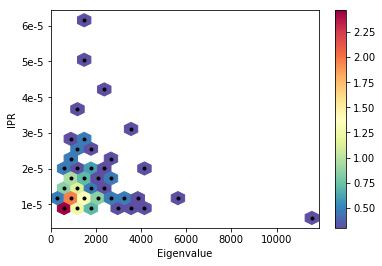

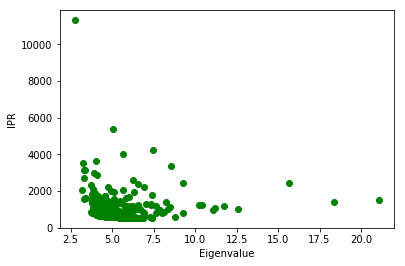

In [312]:
from sklearn import preprocessing
# from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = 'Helvetica'
min_max_scaler = preprocessing.MinMaxScaler()
color_map = plt.cm.Spectral_r
y = iprs_svdcs
x = svd.s
x_norm = min_max_scaler.fit_transform([x])
y_norm = min_max_scaler.fit_transform([y])
# y_norm = y

fig, ax = plt.subplots()

normx=(max(x)-min(x))*0.05
normy=(max(y)-min(y))*0.05

xbnds = np.array([min(x)-normx,max(x)+normx])
ybnds = np.array([min(y)-normy,max(y)+normy])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
# Set gridsize just to make them visually large
image = plt.hexbin(x,y,cmap=color_map,gridsize=20,extent=extent,mincnt=1,bins='log')
# Note that mincnt=1 adds 1 to each count
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        plt.plot(binx,biny,'k.',zorder=100)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
# ax = plt.gca()
y_labels = [' ','1e-5', '2e-5', '3e-5','4e-5','5e-5','6e-5']
ax.set_yticklabels(y_labels)
# x_labels = ['0','2e3', '4e3', '6e3','8e3','1e4', '1.2e4']
# ax.set_xticklabels(x_labels)

# cb = plt.colorbar(image,spacing='uniform',extend='max')

# plt.plot(iprs_svd, svd.s, 'go')
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("IPR")
# plt.ylabel("Eigenvalue")
plt.colorbar()
# plt.show()
# plt.plot(iprs_sgns, sgns_s, 'go')
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("IPR")
plt.xlabel("Eigenvalue")
plt.savefig('ipr.png', format='png',dpi=300)
plt.show()

plt.plot(iprs_svd, svd.s, 'go')
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("IPR")
plt.xlabel("Eigenvalue")
plt.show()

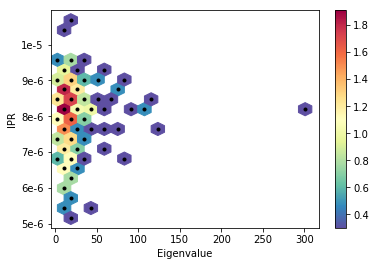

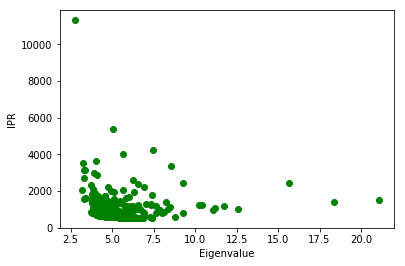

In [315]:
from sklearn import preprocessing
# from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = 'Helvetica'
min_max_scaler = preprocessing.MinMaxScaler()
color_map = plt.cm.Spectral_r
y = iprs_sgnscs
x = sgns100_s
x_norm = min_max_scaler.fit_transform([x])
y_norm = min_max_scaler.fit_transform([y])
# y_norm = y

fig, ax = plt.subplots()

normx=(max(x)-min(x))*0.05
normy=(max(y)-min(y))*0.05

xbnds = np.array([min(x)-normx,max(x)+normx])
ybnds = np.array([min(y)-normy,max(y)+normy])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
# Set gridsize just to make them visually large
image = plt.hexbin(x,y,cmap=color_map,gridsize=20,extent=extent,mincnt=1,bins='log')
# Note that mincnt=1 adds 1 to each count
counts = image.get_array()
ncnts = np.count_nonzero(np.power(10,counts))
verts = image.get_offsets()
for offc in range(verts.shape[0]):
    binx,biny = verts[offc][0],verts[offc][1]
    if counts[offc]:
        plt.plot(binx,biny,'k.',zorder=100)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
# ax = plt.gca()
y_labels = [' ','5e-6', '6e-6', '7e-6','8e-6','9e-6','1e-5']
ax.set_yticklabels(y_labels)
# x_labels = ['0','2e3', '4e3', '6e3','8e3','1e4', '1.2e4']
# ax.set_xticklabels(x_labels)

# cb = plt.colorbar(image,spacing='uniform',extend='max')

# plt.plot(iprs_svd, svd.s, 'go')
# plt.xscale("log")
# plt.yscale("log")
# plt.xlabel("IPR")
# plt.ylabel("Eigenvalue")
plt.colorbar()
# plt.show()
# plt.plot(iprs_sgns, sgns_s, 'go')
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("IPR")
plt.xlabel("Eigenvalue")
plt.savefig('ipr.png', format='png',dpi=300)
plt.show()

plt.plot(iprs_svd, svd.s, 'go')
# plt.xscale("log")
# plt.yscale("log")
plt.ylabel("IPR")
plt.xlabel("Eigenvalue")
plt.show()

In [56]:
i = iprs_svd_argsort[10]
print(i)
print()
print(svd.s[i+5])
print(svd.s[i+4])
print(svd.s[i+3])
print(svd.s[i+2])
print(svd.s[i+1])
print(svd.s[i])
print(svd.s[i-1])
print(svd.s[i-2])
print(svd.s[i-3])
print(svd.s[i-4])
print(svd.s[i-5])
print()
print(iprs_svd[i+5])
print(iprs_svd[i+4])
print(iprs_svd[i+3])
print(iprs_svd[i+2])
print(iprs_svd[i+1])
print(iprs_svd[i])
print(iprs_svd[i-1])
print(iprs_svd[i-2])
print(iprs_svd[i-3])
print(iprs_svd[i-4])
print(iprs_svd[i-5])

65

1218.9035865313533
1233.2178526165962
1238.5373810670262
1249.7044041650738
1252.8879179714388
1260.395724916006
1266.3971175036208
1278.9464706847941
1290.713799650007
1291.9531265273206
1302.8943002065394

2.7969232903477767e-05
1.2279016098327443e-05
1.6483320956214176e-05
1.1651438743343272e-05
1.76261188412675e-05
8.90200154786856e-06
2.8855831098217828e-05
1.765450370868061e-05
1.5252081588920636e-05
1.5763115846686307e-05
1.2417974792174688e-05


499
7.386612132547977


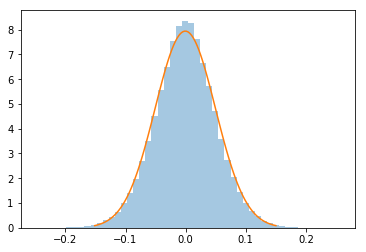

In [294]:
i = iprs_svd_argsort[499]
i = 499
print(i)
print(iprs_svd[i])
# print(iprs_sgns[i])
# kurtosis = stats.kurtosistest(svd.m[:, i])
# print(kurtosis)
# print(stats.kurtosis(svd.m[:, i]))
# skew = stats.skewtest(svd.m[:, i])
# print(skew)
# print(stats.skew(svd.m[:, i]))

mu = np.mean(svd.m[:, i])
sigma = np.std(svd.m[:, i])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plt.xlim((-0.2, 0.2))
sns.distplot(svd.m[:, i], kde=False, norm_hist=True)
plt.plot(x,mlab.normpdf(x, mu, sigma))
# plt.savefig('svd_{}.png'.format(i+1), format='png',dpi=300)
plt.show()

# mu = np.mean(sgns.m[:, i])
# sigma = np.std(sgns.m[:, i])
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# # plt.xlim((-0.2, 0.2))
# sns.distplot(sgns.m[:, i], kde=False, norm_hist=True)
# plt.plot(x,mlab.normpdf(x, mu, sigma))
# plt.show()

In [254]:
yey = []
for i in range(500):
    l = len(svd.m[:,i][svd.m[:,i] >= 0])
#     r = len(svd.m[:,i][svd.m[:,i] <= 0])
    if not l or not r:
        print(i)

0


In [86]:
i = iprs_svd_argsort[499]
i = 440
print(iprs_svd[i])

print(len(svd.m[:,i][svd.m[:,i] >= 0]))
print(len(svd.m[:,i][svd.m[:,i] <= 0]))
x = np.argsort(np.absolute(svd.m[:,i]))[::-1]
# x = np.argsort(svd.m[:,i])[::-1]
# print(svd.m[:,i][x])

locs = np.array(list(map(lambda s: svd.iw[s], x[:20])))
print(locs)
sims = np.array(list(map(lambda sim: svd.similarity(locs[0], sim), locs))) #between locs and locs[0]
print(sims)
print(np.mean(sims))

# svd nns of locs[0]
nns = np.array(svd.closest(locs[0], 20))[:, 1]
print(nns)
nn_sims = np.array(svd.closest(locs[0], 20))[:, 0].astype(np.float32)
print(nn_sims)
print(np.mean(nn_sims))

# sgns nns of locs[0]
# nns = np.array(sgns100.closest(locs[0], 20))[:, 1]
# print(nns)
# nn_sims = np.array(sgns100.closest(locs[0], 20))[:, 0].astype(np.float32)
# print(nn_sims)
# print(np.mean(nn_sims))

8.771826355536499
173733
173010
['vello' 'kohtla' 'urmas' 'selver' 'piret' 'mihkel' 'siim' 'raivo' 'luik'
 'juhan' 'virumaa' 'viiding' 'kadarik' 'eesti' 'hikool' 'viru' 'kuusk'
 'olev' 'vana' 'kalju']
[1.         0.83274051 0.87709534 0.78673334 0.8320892  0.86488594
 0.82198131 0.86273587 0.78310403 0.86003788 0.79830142 0.86360648
 0.85218797 0.85455743 0.86086675 0.82874892 0.82852215 0.86188243
 0.72805513 0.82534474]
0.8411738420547291
['vello' 'priit' 'indrek' 'urmas' 'tiiu' 'tiit' 'madis' 'toomas' 'virve'
 'kangro' 'mihkel' 'nurme' 'viiding' 'raivo' 'estonian' 'olev' 'hikool'
 'juhan' 'ilmar' 'mnaasium']
[1.         0.8871178  0.8806167  0.87709534 0.8770746  0.8741316
 0.87219614 0.86911887 0.86901796 0.8661384  0.8648859  0.8647226
 0.86360645 0.86273587 0.8625992  0.86188245 0.8608667  0.86003786
 0.85936373 0.8591162 ]
0.87461627


In [73]:
# sns.heatmap(svd.m[:, 42][np.newaxis], cmap="RdBu_r", center=0, xticklabels=0)

In [18]:
np.dot(svd.m[:, 0],svd.m[:, 1])

-67.58080105754351

['airport' 'airports' 'iata' 'destinations' 'flights' 'dafif' 'airline'
 'stopover' 'airlines' 'runway' 'icao' 'sheremetyevo' 'airways'
 'fiumicino' 'malpensa' 'rwy' 'hub' 'airstrip' 'hubs' 'vueling']
['airport' 'airports' 'airstrip' 'iata' 'sheremetyevo' 'malpensa'
 'flights' 'dafif' 'heliport' 'runway' 'stopover' 'airline' 'runways'
 'taxiway' 'linate' 'aerodrome' 'faa' 'ourairports' 'stansted' 'airpark']


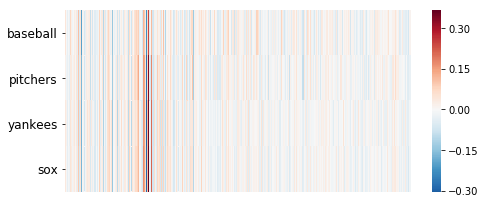

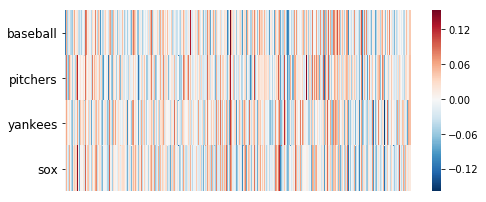


SVD_NEG
[ 53 163]
['located' 'near' 'connecting' 'situated' 'connects' 'town' 'towns'
 'branch' 'junction' 'geography']
['stakecenter' 'mescal' 'centralists' 'cananea' 'quemado' 'potosi'
 'garita' 'estancia' 'tecolote' 'manganese']

SVD_POS
[337 123]
['vueling' 'tuifly' 'eurowings' 'tunisair' 'fiumicino' 'interjet'
 'transavia' 'wizz' 'easyjet' 'volotea']
['tolmachevo' 'syktyvkar' 'yemelyanovo' 'tsentralny' 'bolshoye'
 'domodedovo' 'salekhard' 'cccp' 'yuzhny' 'yakutsk']

SVD_ALL
[ 53 337 163 178 123 369  60  67]
['located' 'near' 'connecting' 'situated' 'connects' 'bandeira' 'trindade'
 'penha' 'concei' 'velho']
['vueling' 'tuifly' 'eurowings' 'tunisair' 'fiumicino' 'interjet'
 'transavia' 'wizz' 'easyjet' 'volotea']
['stakecenter' 'ever' 'mescal' 'centralists' 'cananea' 'quemado' 'potosi'
 'garita' 'estancia' 'tecolote']
['emburgh' 'kempers' 'kronemann' 'oosting' 'salumaa' 'tramacchi' 'nijssen'
 'noteboom' 'orsanic' 'kratzmann']
['yamanashi' 'gun' 'tolmachevo' 'syktyvkar' 'yemelyanov

In [289]:
w = 'airport'

nns = np.array(svd.closest(w, 20))
print(nns[:,1])
nns = np.array(sgns.closest(w, 20))
print(nns[:,1])

# words = np.array(svd.closest(w, 4))[:,1]
# presidents = ['president','commissioner','minister','superintendent','chairman']
words = ['baseball','pitchers','yankees','sox']
words_svd = np.array(list(map(lambda w: svd.m[svd.wi[w]], words)))
words_sgns = np.array(list(map(lambda w: sgns.m[sgns.wi[w]], words)))

ax = sns.heatmap(words_svd, cmap='RdBu_r', center=0, xticklabels=0)
# ax = sns.heatmap(words_svd, cmap=sns.diverging_palette(0, 255, sep=32, n=256), center=0, xticklabels=0)
plt.subplots_adjust(left=0, right=1, top=0.86, bottom=0.23)
ax.set_yticklabels(words,rotation='horizontal',fontsize=12)
plt.savefig('heatmap_svd.png', format='png',dpi=300)
plt.show()
ax = sns.heatmap(words_sgns, cmap='RdBu_r', center=0, xticklabels=0)
# ax = sns.heatmap(words_sgns, cmap=sns.diverging_palette(0, 255, sep=32, n=256), center=0, xticklabels=0)
plt.subplots_adjust(left=0, right=1, top=0.86, bottom=0.23)
ax.set_yticklabels(words,rotation='horizontal',fontsize=12)
plt.savefig('heatmap_sgns.png', format='png',dpi=300)
plt.show()

word = svd.m[svd.wi[w]]
neg_col_idx = np.argsort(word)[:2]
pos_col_idx = np.argsort(word)[::-1][:2]
all_col_idx = np.argsort(np.absolute(word))[::-1][:8]


print()
print("SVD_NEG")
print(neg_col_idx)
for col in neg_col_idx:
    x = np.argsort(svd.m[:,col])
    locs = np.array(list(map(lambda s: svd.iw[s], x[:10])))
    print(locs)
print()
print("SVD_POS")
print(pos_col_idx)
for col in pos_col_idx:
    x = np.argsort(svd.m[:,col])[::-1]
    locs = np.array(list(map(lambda s: svd.iw[s], x[:10])))
    print(locs)
print()
print("SVD_ALL")
print(all_col_idx)
for col in all_col_idx:
    x = np.argsort(np.absolute(svd.m[:,col]))[::-1]
    locs = np.array(list(map(lambda s: svd.iw[s], x[:10])))
    print(locs)
    
word = sgns.m[sgns.wi[w]]
neg_col_idx = np.argsort(word)[:2]
pos_col_idx = np.argsort(word)[::-1][:2]
all_col_idx = np.argsort(np.absolute(word))[::-1][:10]

print()
# print("SGNS_NEG")
# for col in neg_col_idx:
#     x = np.argsort(sgns.m[:,col])
#     locs = np.array(list(map(lambda s: sgns.iw[s], x[:10])))
#     print(locs)
# print()
# print("SGNS_POS")
# for col in pos_col_idx:
#     x = np.argsort(sgns.m[:,col])[::-1]
#     locs = np.array(list(map(lambda s: sgns.iw[s], x[:10])))
#     print(locs)
# print()
print("SGNS_ALL")
print(all_col_idx)
for col in all_col_idx:
    x = np.argsort(np.absolute(sgns.m[:,col]))[::-1]
    locs = np.array(list(map(lambda s: sgns.iw[s], x[:10])))
    print(locs)

In [ ]:
import csv

with open('analysis.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter='\t')
    csvwriter.writerow(['i', 'eig', 'ipr', 'cols', 'sim', 'rows', 'nn'])
#     spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
#     spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])
    
    for i in range(len(svd.s)):
        eig = svd.s[i]
        ipr = iprs_svd[i]
        
        x = np.argsort(np.absolute(svd.m[:,i]))[::-1]

        locs = np.array(list(map(lambda s: svd.iw[s], x[:20])))
        sims = np.array(list(map(lambda sim: svd.similarity(locs[0], sim), locs))) #between locs and locs[0]

        # svd nns of locs[0]
        nns = np.array(svd.closest(locs[0], 20))[:, 1]
        nn_sims = np.array(svd.closest(locs[0], 20))[:, 0].astype(np.float32)
        csvwriter.writerow([i, eig, ipr, locs, np.mean(sims), nns, np.mean(nn_sims)])

## Preliminary Analysis

In [ ]:
# s = la.svd(W, compute_uv=False, full_matrices=True, check_finite=False)

In [ ]:
# x = da.from_array(W, chunks=(1000, 1000))
# xt = da.from_array(W.T, chunks=(1000, 1000))
# X = da.matmul(x, xt)
# # x = da.from_array(X, chunks=(1000, 1000))
# u,s,v = da.linalg.svd(X, name=None)

In [ ]:
plt.hist(s, 50, normed=True)
# plt.xlim((0, 0.3))
0

In [ ]:
def marcenkopasturpdf(x, c):
    # Marchenko Pastur Density Function for c > 1
#     ub = (1 + np.sqrt(c))**2
#     lb = (1 - np.sqrt(c))**2 
    ub = 1 + 1/c + 2 * np.sqrt(1/c)
    lb = 1 + 1/c - 2 * np.sqrt(1/c)
    mp = np.zeros(len(x))
    
    # Figure out indices where mp is to be calculated
    lbidx = np.where(x > lb)
    ubidx = np.where(x < ub)
    a = lbidx[0][0]
    b = ubidx[-1][-1]
    xh = x[a:b+1]
    # MP distribution
    mp[a:b+1] = c* np.sqrt((xh - lb)*(ub - xh))/(2*math.pi*xh)              
#     mp[a:b+1] = np.sqrt((xh - lb)*(ub - xh))/(2*math.pi*c*xh)              
    return lb, ub, mp

In [ ]:
l = np.arange(0, 5, step=0.01)
# print(l)
c = 461408206 / 344332
print(c)
lb, ub, mp = marcenkopasturpdf(l, c)
print(lb,ub)
print(np.mean(mp))
print(np.min(mp), np.max(mp))
# print(mp)
# sns.distplot(l, kde=True, norm_hist=True)
plt.plot(l, mp, linewidth=1, color='red')
# plt.hist(mp, linewidth=1, color='red',normed=True)
# sns.distplot(sgns001_s)
# plt.hist(svd.s/1000, 100, normed=True)
# plt.hist(s, 50, normed=True)
# plt.xlim((0, 0.3))
# plt.hist(mp, 'auto', normed=True)
# plt.hist(mp, 'auto', normed=True, range=(0,ub))
sns.distplot(svd.s/c, kde=False, norm_hist=True)
plt.ylabel = 'MP'
plt.xlabel = 'Eigenvalue'
plt.show()
# sns.distplot(mp)


In [ ]:
s = [0, 1, 2, 3, 4]
# s = [0.01,0.1, 1, 10, 100] 10^i
wss = [0,0,0,2,34]#[::-1]
wsr = [0,0,0,1,37]#[::-1]
men = [0,0,0,22,968]#[::-1]
mt = [1,1,1,4,73]#[::-1]
rw = [410,410,524,1117,1744]#[::-1]
sl = [1,1,1,6,269]#[::-1]
glr = [0,0,58,2792,11488]#[::-1]
msr = [1386,1386,1620,2598,4598]#[::-1]

sns.set_style("whitegrid")

plt.plot(s, rw, color='red', label='rw')
plt.plot(s, men, color='blue',label='men')
plt.plot(s, sl, label='sl')
plt.plot(s, mt, label='mt')
plt.plot(s, wss, label='wss')
plt.plot(s, wsr, label='wsr')
plt.xticks(s)
plt.xlabel('Negative Exponents of 10')
plt.ylabel('UNK tokens')
leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=True, fancybox=True)

plt.show()

plt.plot(s, glr, label='glr')
plt.plot(s, msr, label='msr')
plt.xticks(s)
plt.xlabel('Negative Exponents of 10')
plt.ylabel('UNK tokens')
leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=True, fancybox=True)

plt.show()

